<a href="https://colab.research.google.com/github/mehrdadkazemi254/PopulationGentecis/blob/main/%F0%9F%A7%ACna%C3%AFve%20QTL%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **naïve QTL analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_excel('qtl.xlsx')
y = data['Trait_1'].values.reshape(-1,1)
data.head(10)
#1: homozygote 2:heterozygote

,MK-1-1,MK-1-2,MK-1-3,MK-1-4,MK-1-5,MK-1-6,MK-1-7,MK-1-8,MK-1-9,MK-1-10,MK-1-11,MK-1-12,MK-2-1,MK-2-2,MK-2-3,MK-2-4,MK-2-5,MK-2-6,MK-2-7,MK-2-8,MK-2-9,MK-2-10,MK-2-11,MK-2-12,MK-3-1,MK-3-2,MK-3-3,MK-3-4,MK-3-5,MK-3-6,MK-3-7,MK-3-8,MK-3-9,MK-3-10,MK-3-11,MK-3-12,Trait_1
0,2,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,18.4029
1,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,19.0539
2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,19.1214
3,1,1,1,2,2,2,2,2,2,2,1,1,1,1,1,2,2,1,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,1,1,17.6313
4,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18.0998
5,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,16.4833
6,2,2,2,2,2,2,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,1,1,1,16.4347
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,20.0281
8,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,17.2948
9,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,14.6550


In [ ]:
def p_val(xData):
  X2 = sm.add_constant(xData)
  est = sm.OLS(y, X2)
  fii = est.fit()
  p_values = fii.summary2().tables[1]['P>|t|']
  linear_regressor = LinearRegression()
  linear_regressor.fit(xData,y)
  pred = linear_regressor.predict(xData)
  plt.scatter(xData,y)
  plt.plot(xData,pred,color='green')
  plt.show()
  print(f"the p-value is {p_values['x1']}")
  print(f"the slope is {linear_regressor.coef_[0][0]}")
  return p_values['x1'], linear_regressor.coef_[0][0]
  

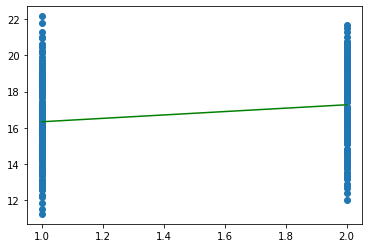

the p-value is 0.0005814920845710053
the slope is 0.9360234288004987
1,1


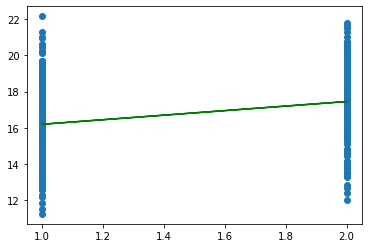

the p-value is 3.5263966774624647e-06
the slope is 1.2531285714285711
1,2


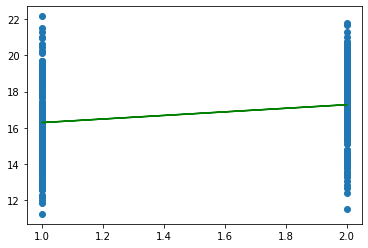

the p-value is 0.0002846739508361725
the slope is 0.9852093333333327
1,3


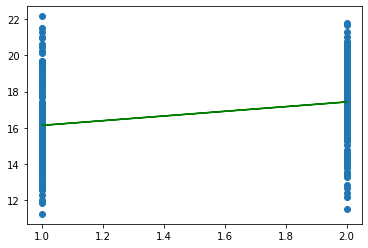

the p-value is 1.6665515087301065e-06
the slope is 1.2899546666666661
1,4


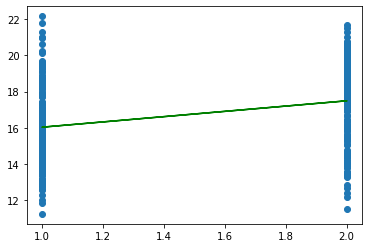

the p-value is 5.760313372431524e-08
the slope is 1.4538830279309738
1,5


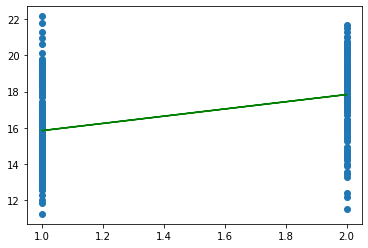

the p-value is 3.462240850848717e-14
the slope is 1.9876967750568724
1,6


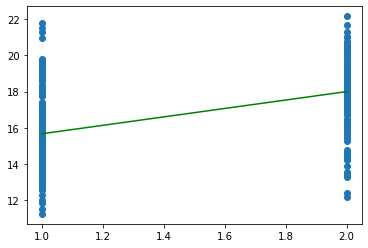

the p-value is 1.5507729168731049e-19
the slope is 2.3232003919647237
1,7


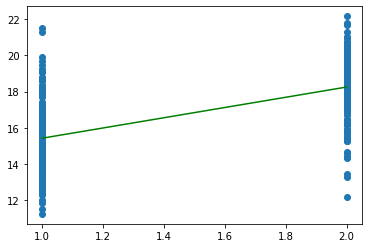

the p-value is 3.563738792036961e-30
the slope is 2.821669604700854
1,8


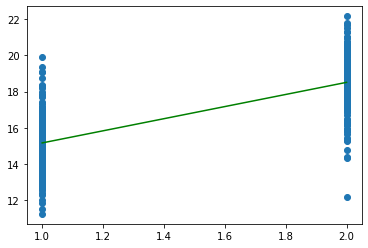

the p-value is 1.954754508162178e-46
the slope is 3.341220022246941
1,9


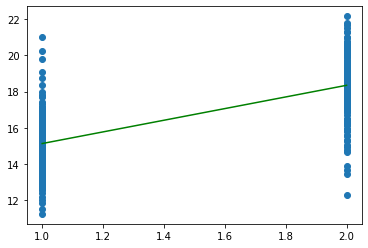

the p-value is 8.996837639360674e-42
the slope is 3.2124802526240885
1,10


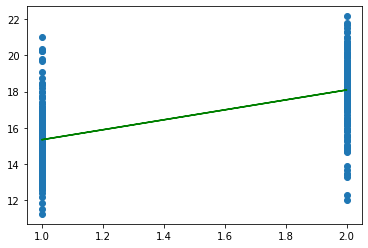

the p-value is 3.530487147068962e-28
the slope is 2.7413677787180966
1,11


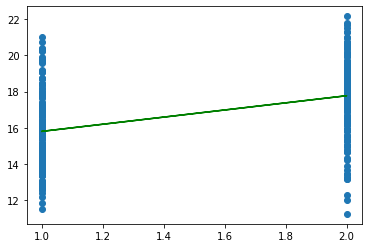

the p-value is 6.821859384112938e-14
the slope is 1.9631239610649356
1,12


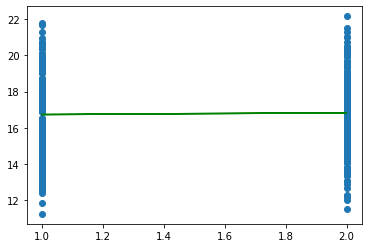

the p-value is 0.7189010241884455
the slope is 0.09879066666666678
2,1


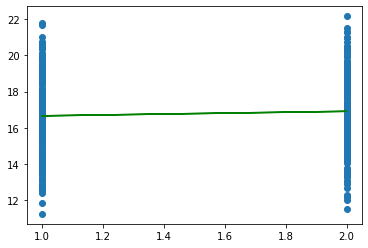

the p-value is 0.3640321812193895
the slope is 0.24913503893214664
2,2


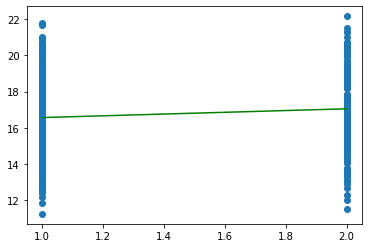

the p-value is 0.07887525417862486
the slope is 0.4838822154288793
2,3


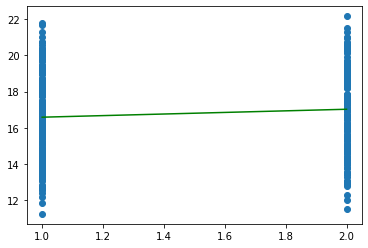

the p-value is 0.11172150672916133
the slope is 0.438171461967272
2,4


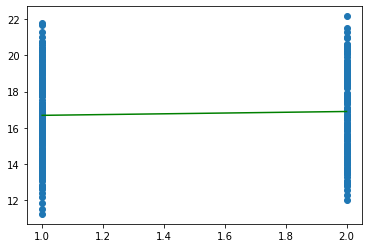

the p-value is 0.44252499671788714
the slope is 0.21223024891774914
2,5


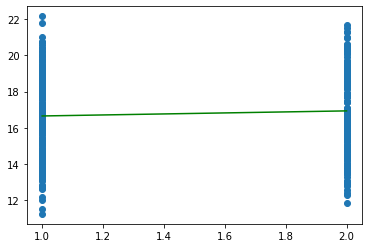

the p-value is 0.3088406929698843
the slope is 0.2801615691191618
2,6


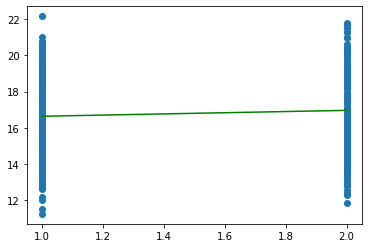

the p-value is 0.23782258971636308
the slope is 0.32575624690468674
2,7


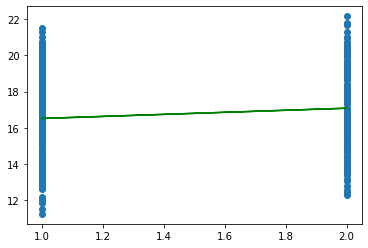

the p-value is 0.0391987563515038
the slope is 0.5650525893215573
2,8


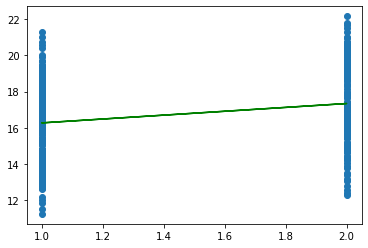

the p-value is 8.41941334499896e-05
the slope is 1.0666692797648214
2,9


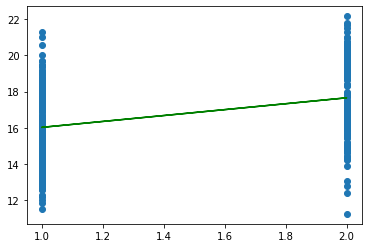

the p-value is 1.0760546336816247e-09
the slope is 1.6272441127843065
2,10


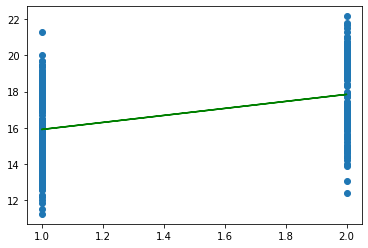

the p-value is 2.5496036828697794e-13
the slope is 1.9309562289562279
2,11


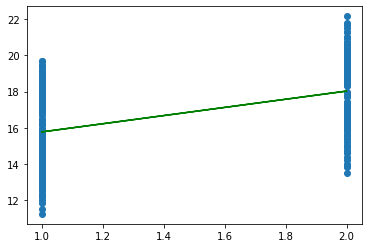

the p-value is 4.381402196971724e-18
the slope is 2.2496743391476346
2,12


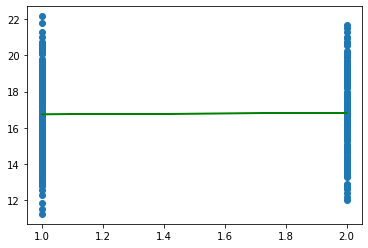

the p-value is 0.7532168079289843
the slope is 0.08634482758620705
3,1


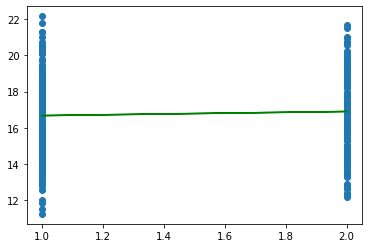

the p-value is 0.40837356131958347
the slope is 0.22714111249777133
3,2


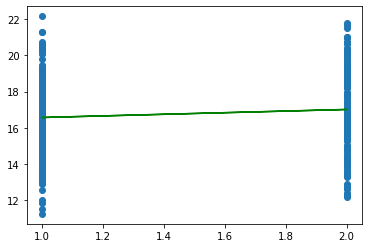

the p-value is 0.10608606538889293
the slope is 0.4429903846153845
3,3


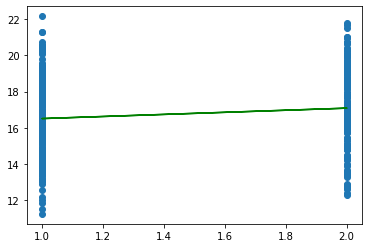

the p-value is 0.0358222909699631
the slope is 0.5748568372258867
3,4


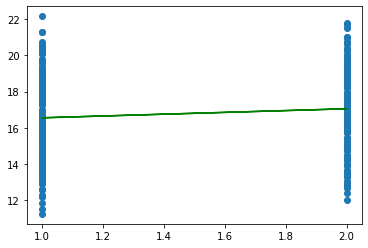

the p-value is 0.06994904945604846
the slope is 0.49769108964036507
3,5


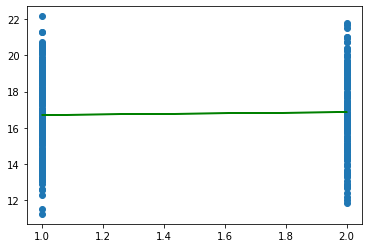

the p-value is 0.5715699599119867
the slope is 0.15547726867534317
3,6


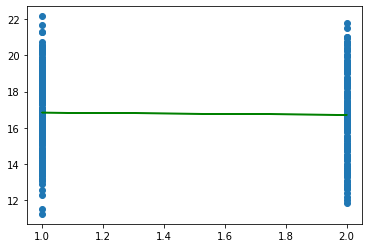

the p-value is 0.649589427403643
the slope is -0.12479407051282056
3,7


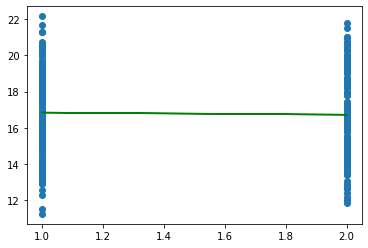

the p-value is 0.6695150715157618
the slope is -0.11715424964438129
3,8


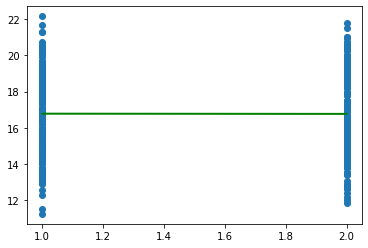

the p-value is 0.9823919841454244
the slope is -0.006060487457747968
3,9


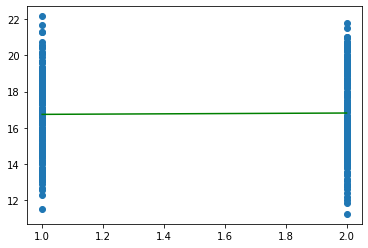

the p-value is 0.7884461077770504
the slope is 0.07381696428571445
3,10


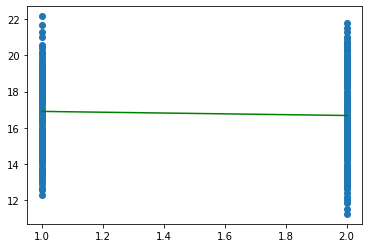

the p-value is 0.4150553621172758
the slope is -0.22472996632996642
3,11


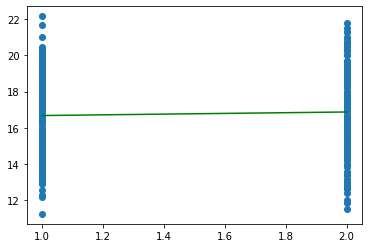

the p-value is 0.47533878700371857
the slope is 0.19629866071428576
3,12


In [ ]:
result = []
for i in range(36):
  x = data.iloc[:,i]
  temp = p_val(x.values.reshape(-1,1))
  result.append(temp)
  if i < 12:
    print(f"1,{i+1}")
  if 12 <= i <24:
    print(f"2,{i-11}")
  if 24<= i <36:
    print(f"3,{i-23}")
  

In [ ]:
result = pd.DataFrame(result, columns=['P_value', 'Slope'])
result

,P_value,Slope
0,5.814921e-04,0.936023
1,3.526397e-06,1.253129
2,2.846740e-04,0.985209
3,1.666552e-06,1.289955
4,5.760313e-08,1.453883
5,3.462241e-14,1.987697
6,1.550773e-19,2.323200
7,3.563739e-30,2.821670
8,1.954755e-46,3.341220
9,8.996838e-42,3.212480


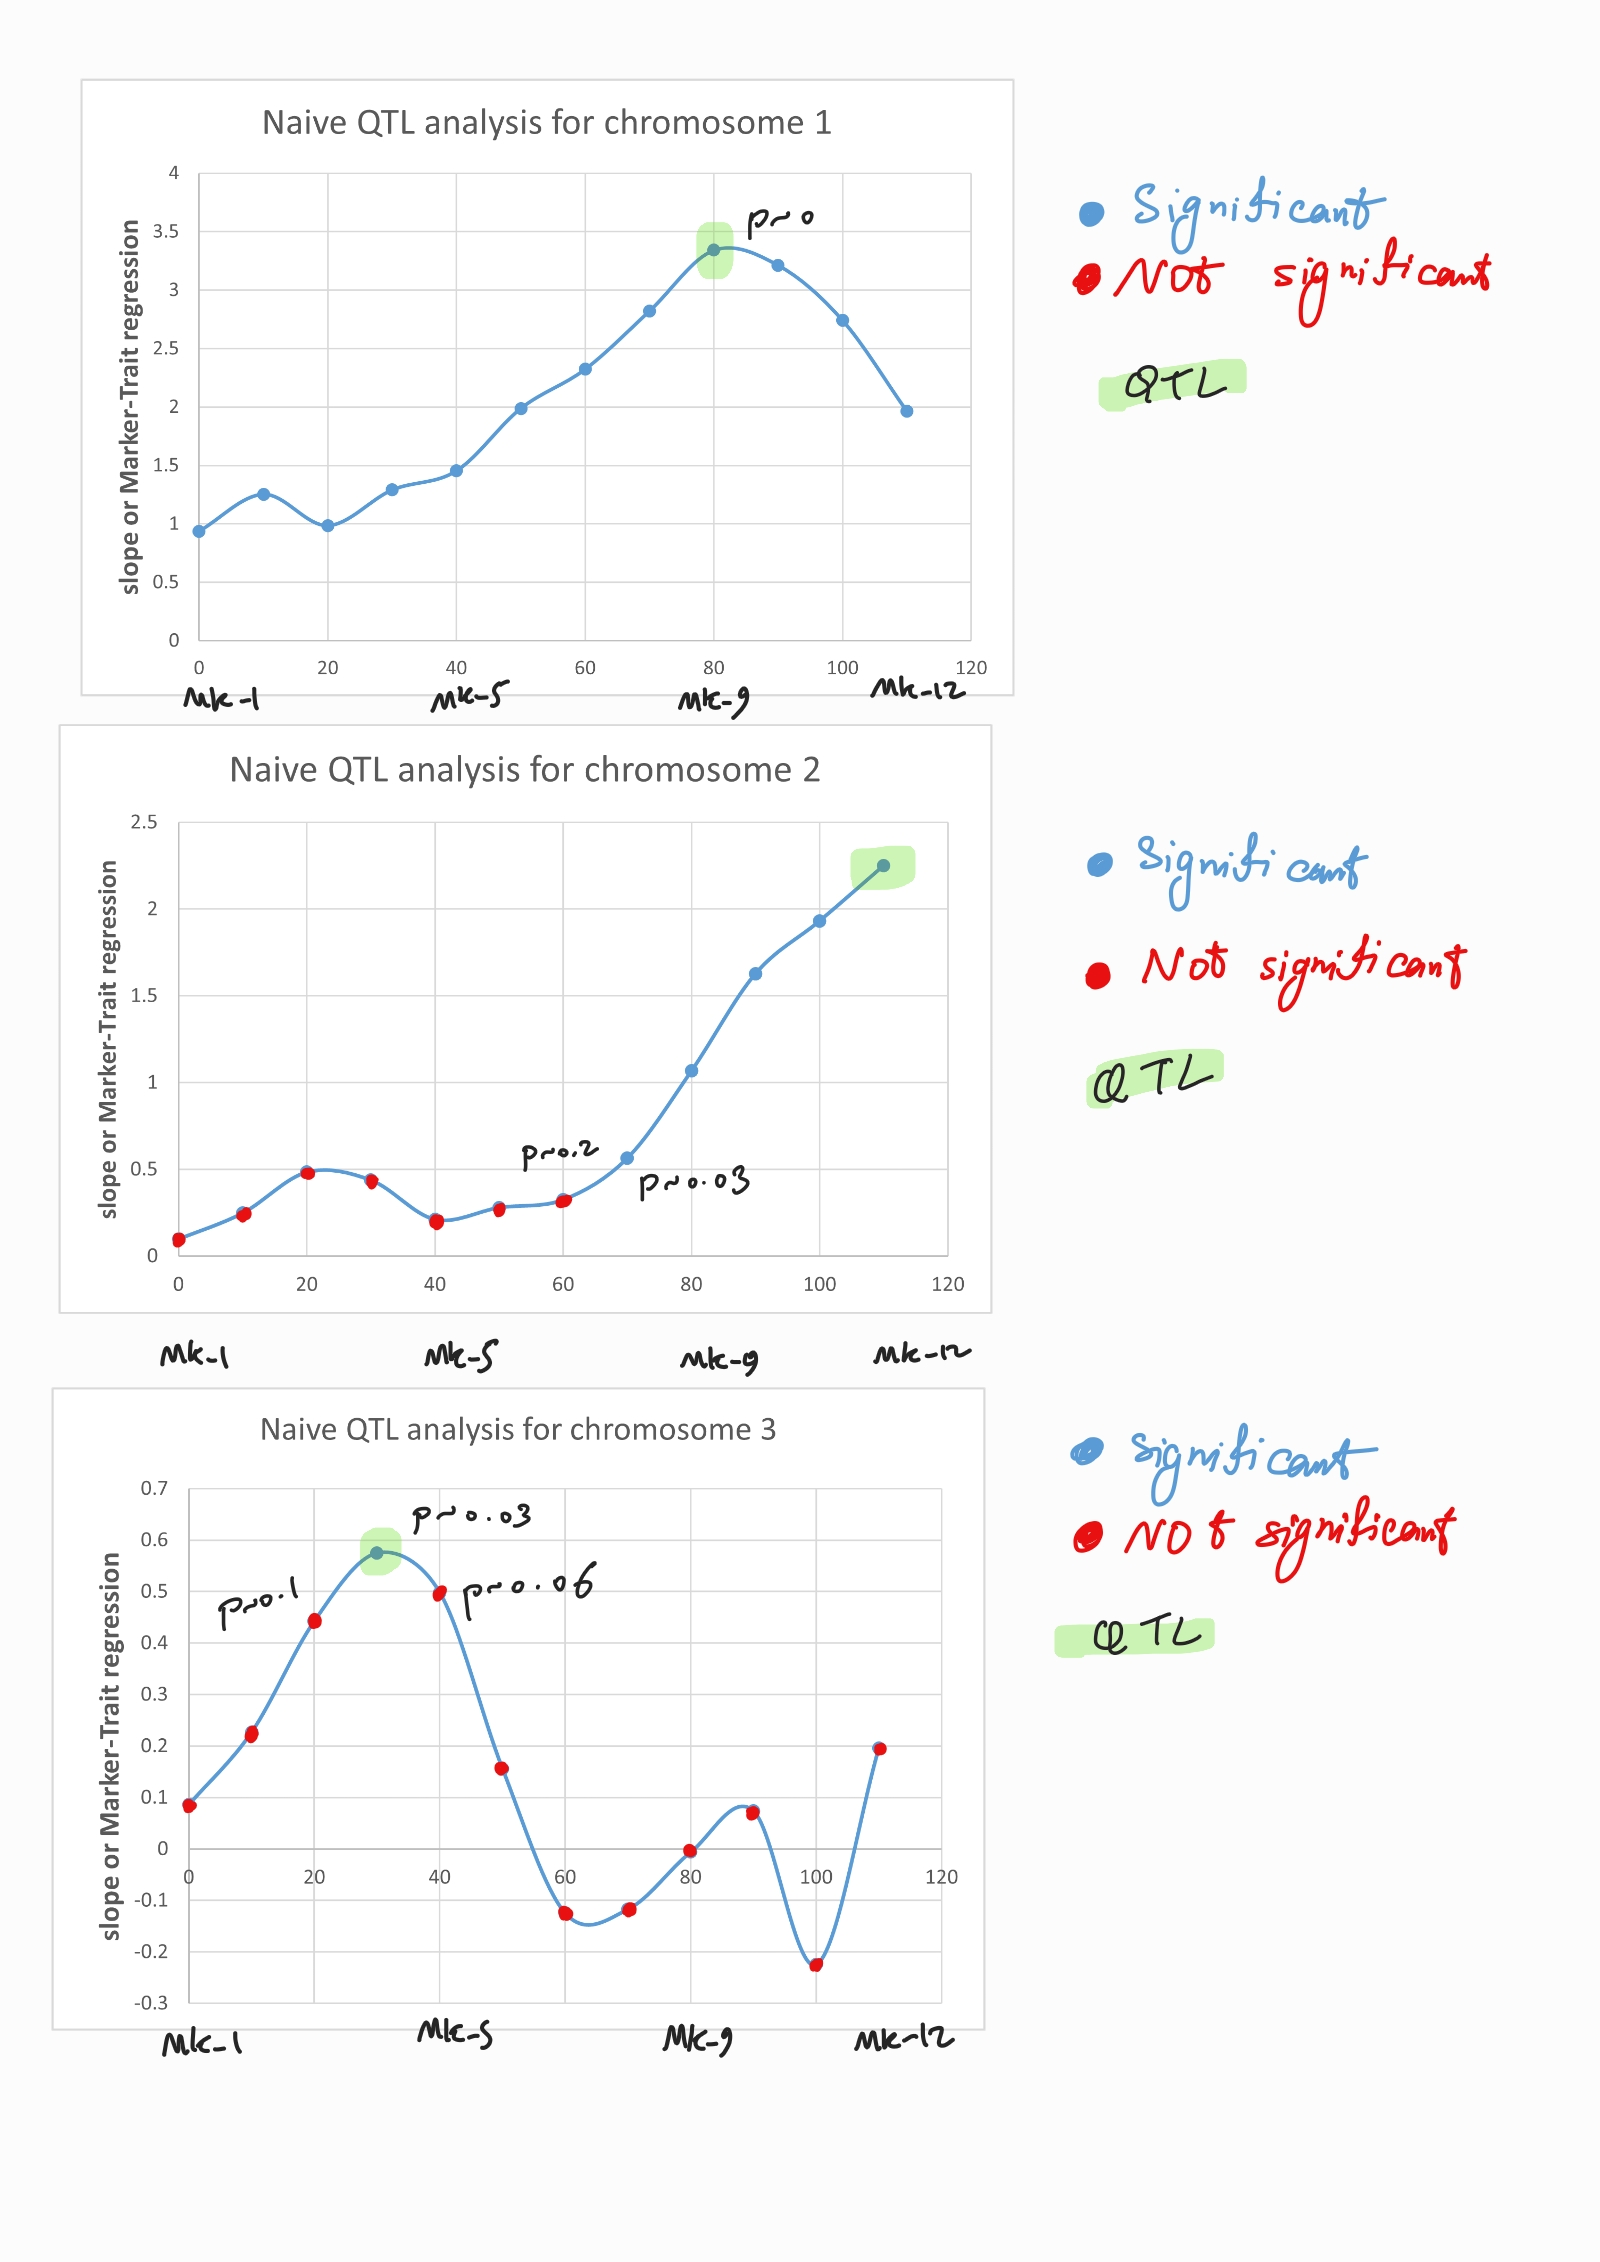